## Regularized Regression Methods 

### Ridge Regression
* Ridge Regression imposes penalty on size of coef. by adding l2 norm
* Less impacted by outliers.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge

ridge = Ridge(alpha=.1)
lr = LinearRegression()
ridge.fit([[0, 0], [0, 0], [1, 1]],  [0, .1, 1])
lr.fit([[0, 0], [0, 0], [1, 1]],  [0, .1, 1])

In [ ]:
ridge.coef_

In [ ]:
lr.coef_

### make_regression creates dataset for a random regression problem.

In [48]:
from sklearn.datasets import make_regression
X,Y = make_regression(n_features=1, noise=10, n_samples=1000)

In [ ]:
pd.DataFrame(X)

In [ ]:
pd.DataFrame(Y)

### plot scatter plot to see the relationship between X and Y

In [ ]:
plt.xlabel('Feature - X')
plt.ylabel('Target - Y')
plt.scatter(X,Y,s=5)

### Use linear Regression on the above data

In [49]:
lr.fit(X,Y)
pred = lr.predict(X)

### Add outliers to the data

In [ ]:
Y[950:]

In [ ]:
outliers = Y[950:] - 600

In [ ]:
Y_Out = np.append(Y[:950],outliers)

In [ ]:
plt.scatter(X,Y_Out,s=5)

In [ ]:
lr = LinearRegression()
lr.fit(X,Y_Out)
pred_Out = lr.predict(X)

### Linear Regression with and without outliers

In [ ]:
plt.scatter(X,Y_Out,s=5,label='actual')
plt.scatter(X,pred_Out,s=5,label='prediction with outliers')
plt.scatter(X,pred,s=5,c='k', label='prediction without outlier')
plt.legend()
plt.title('Linear Regression')

### Ridge regression on the same data set

In [40]:
ridge = Ridge(alpha=1000)
ridge.fit(X,Y_Out)
pred_ridge = ridge.predict(X)

Text(0.5,1,'Linear Regression')

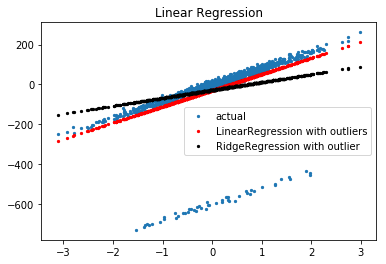

In [41]:
plt.scatter(X,Y_Out,s=5,label='actual')
plt.scatter(X,pred_Out,s=5, c='r' ,label='LinearRegression with outliers')
plt.scatter(X,pred_ridge,s=5,c='k', label='RidgeRegression with outlier')
plt.legend()
plt.title('Linear Regression')

In [42]:
ridge.coef_

array([39.57419555])

### Effects of alpha using Ridge on Coeficients 
* Data generation

In [43]:
X, y, w = make_regression(n_samples=10, n_features=10, coef=True,
                          random_state=1, bias=3.5)

In [44]:
w

array([80.71051956, 10.74941291, 38.78606441, 13.64552257,  5.99176895,
       86.35418546, 12.13434557,  4.45518785, 74.71216427, 55.6240234 ])

### Training Ridge for different values of alpha
* Coefs calculated are appended to a list
* Generate 20 alphas from 10^-6 to 10^6

In [45]:
alphas = np.logspace(-6, 6, 200)
alphas[:20]

array([1.00000000e-06, 1.14895100e-06, 1.32008840e-06, 1.51671689e-06,
       1.74263339e-06, 2.00220037e-06, 2.30043012e-06, 2.64308149e-06,
       3.03677112e-06, 3.48910121e-06, 4.00880633e-06, 4.60592204e-06,
       5.29197874e-06, 6.08022426e-06, 6.98587975e-06, 8.02643352e-06,
       9.22197882e-06, 1.05956018e-05, 1.21738273e-05, 1.39871310e-05])

In [46]:
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

#### Plotting alphas & coefs
* Different colors represents different coefs

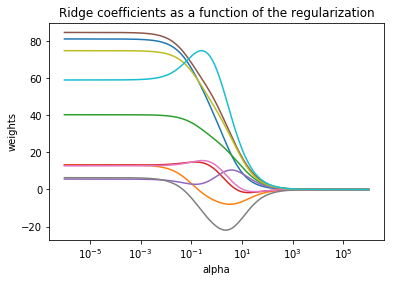

In [47]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.show()

* As alpha tends toward zero the coefficients found by Ridge regression stabilize towards the randomly sampled vector w (similar to LinearRegression).
* For big alpha (strong regularisation) the coefficients are smaller (eventually converging at 0) leading to a simpler and biased solution.